Análisis del PIB de México usando Python. 
Se realiza un análisis de regresión lineal y uno polinomial de oren >1 respecto del consumo privado
se comparan las bondades de ajuste
se realiza un pronósitico.
se plica un filtro de Hodrick y Prescott para el ngreso nacional y se analiza el ciclo y la tendencia para México.


In [225]:
#importamos las librerías necesarias
import pandas as pd# para trabjar con Dataframes
import numpy as np #librería de análisis numérico
import matplotlib.pyplot as plt#para graficar los resultados

In [189]:
#Cargamos la información descargada: fuente INEGI (Cuentas Nacionales)
data=pd.read_excel('Analisis PIB1.xlsx', index_col=None)
data.head()
#print(data[['Año', ' Producto interno bruto']])

,Año,Producto interno bruto,tasas de crec del pib,Importaciones de bienes y servicios,Oferta y demanda,Consumo privado,Consumo de gobierno,Formación bruta de capital fijo,Variación de existencias,Exportaciones de bienes y servicios
0,1993,1.016557e+07,NaN,1577244.709,1.174282e+07,6310223.852,1409971.789,2145592.016,124719.790,1488167.826
1,1994,1.066786e+07,0.049411,1857120.147,1.252498e+07,6644793.945,1452318.153,2460433.781,137831.383,1619054.743
2,1995,9.996721e+06,-0.062912,1561053.684,1.155777e+07,6254226.306,1436595.436,1578455.250,207521.116,1946070.846
3,1996,1.067382e+07,0.067733,1833893.978,1.250772e+07,6537720.731,1436303.198,1884722.340,182667.438,2246698.545
4,1997,1.140465e+07,0.068469,2257764.392,1.366241e+07,7026835.954,1505832.807,2170678.431,188068.425,2457556.184


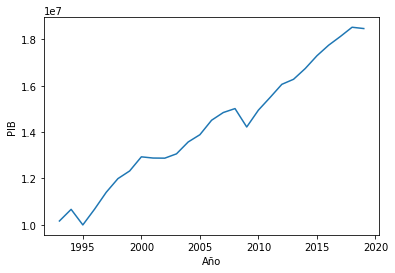

In [226]:
#A continuación se genera la gráfica del PIB
plt.plot(data['Año'],data[' Producto interno bruto']); plt.xlabel('Año'); plt.ylabel('PIB');
plt.show()

In [191]:
PIB=np.array(data[' Producto interno bruto'])
C=np.array(data['Consumo privado'])

In [192]:
#Utilizamos una columna de unos para el intercepto y se requiere la transpuesta de C con intercepto
C2=np.array([np.ones(27), C]).T
#print(C2)
print(C2.shape)

(27, 2)


<function matplotlib.pyplot.show(*args, **kw)>

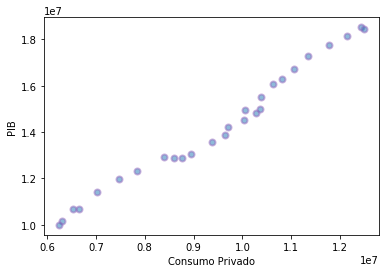

In [227]:
#como vamos a generar un modelo del PIB con base en el Consumo de las familias procedemos a graficar uno vs el otro
plt.scatter(C,PIB, linewidth=2,
               alpha=0.5, edgecolors='#9467bd');plt.xlabel('Consumo Privado'); plt.ylabel('PIB');
plt.show

Recordamos que para minimizar los errores por el método de mínimos cuadrados se usa: $\beta = (X^{T}X)^{-1}X^{T}Y$

[1.34234601e+00 1.55644051e+06]
 
1.342 x + 1.556e+06


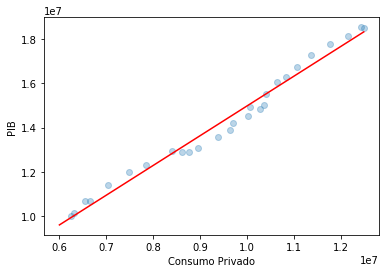

In [228]:
#Se realizan las operaciones indicadas,  una vez obtenido beta generamos el modelo de la regresión
b=np.linalg.inv(C2.T @ C2)@C2.T@PIB
B=np.array([b[1], b[0]])
print(B)
modelo=np.poly1d(B)
print(modelo)
plt.scatter(C,PIB, alpha=0.3);plt.xlabel('Consumo Privado'); plt.ylabel('PIB');
#La siguiente es la represenación gráfica del modelo:
plt.plot([0.6e+7, 1.24825996e+07],[b[0]+ b[1]*0.6e+7, b[0]+ b[1]*1.24825996e+07], c="red")
plt.show
Ý1=modelo(C)
#print(Ý1)
#print(PIB)

In [181]:
#Obtenemos la bondad de ajuste del modelo lineal simple
from sklearn.metrics import r2_score
R2=r2_score(PIB, modelo(C))
print(R2)

0.9804319637871489


           6             5             4             3             2
3.949e-33 x - 2.231e-25 x + 5.165e-18 x - 6.267e-11 x + 0.0004202 x - 1474 x + 2.121e+09


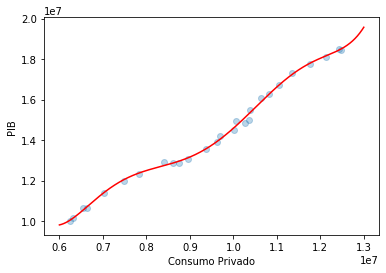

0.997569675667948


In [231]:
# a Nocntinuación obtenemos un moelo e ajuste no lienal usando un plinómio de 6o grado
model = np.polyfit(C, PIB, 6)
#print(model)
Ý = np.poly1d(model)
#mostramos el polinomio encontrado
print(Ý)
#Obtenemos la Bondad de ajuste
from sklearn.metrics import r2_score
R_2=r2_score(PIB, Ý(C))
#Obtenemos el rango a graficar:
C_lin_reg= range(6000000,13000000)
PIB_line_reg=Ý(C_lin_reg)
plt.scatter(C, PIB, alpha=0.3); plt.xlabel('Consumo Privado'); plt.ylabel('PIB');

plt.plot(C_lin_reg, PIB_line_reg, c = 'r')
plt.show()
# mostramos la bondad de ajuste para el nuevo modelo
print(R_2)

In [232]:
M_aj=np.maximum(R_2, R_22)
print(M_aj)

0.997569675667948
